In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
# DEFINIÇÃO DOS DADOS: INPUT LAYERS (1), HIDDEN LAYERS (32), OUTPUT LAYERS (1)
# DADOS DE ENTRADA: INSTANTE DE TEMPO (t)
# DADOS DE SAÍDA:   POSIÇÃO EM RELAÇÃO AO INSTANTE DE TEMPO (x)

# FUNÇÃO QUE REGE O SISTEMA: x(t)=Ae^(-βt)cos(ω1t + φ); w1 = sqrt(ω² - β²)

In [24]:
def solution(w0, Beta, Amplitude, Phase, Size, TimeInterval):
    w1 = np.sqrt(pow(w0, 2) - pow(Beta, 2))
    
    #x(t) = A*np.exp(-Beta*time)*np.cos(w1*t + phase)
    
    x = []
    tempo = []
    for iter in range(Size):
        t = (TimeInterval * iter)
        tempo.append(t)
        xt = Amplitude * np.exp(-Beta*t) * np.cos(w1*t + Phase)
        x.append(xt)

    x = np.array(x, dtype=np.float16)
    t = np.array(t, dtype=np.float16)

    return x, tempo

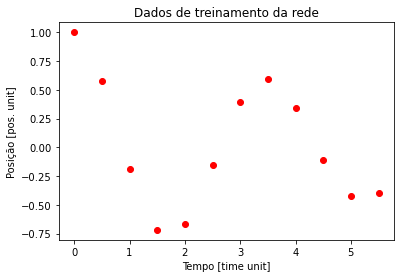

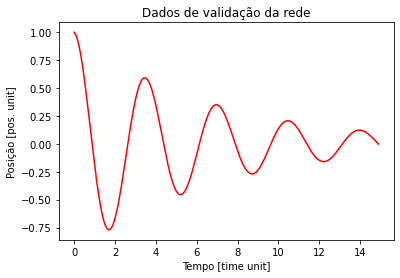

μ: 0.300, k: 3.240


In [25]:
W0   = 1.80
BETA = 0.15
A    = 1.00
FASE = 0.00
time_units = 6
DT   = 0.5
SIZE =  (int)(time_units/DT)

x, t = solution(W0, BETA, A, FASE, SIZE, DT)

time_units = 15
DT   = 0.1
SIZE =  (int)(time_units/DT)
vx, vt = solution(W0, BETA, A, FASE, SIZE, DT)


plt.plot(t, x, 'ro')
plt.title('Dados de treinamento da rede')
plt.xlabel('Tempo [time unit]')
plt.ylabel('Posição [pos. unit]')
plt.show()

plt.plot(vt, vx, 'r-')
plt.title('Dados de validação da rede')
plt.xlabel('Tempo [time unit]')
plt.ylabel('Posição [pos. unit]')
plt.show()

# VALOR DE TF = 6 [TIME UNITS]
# VALOR DE TP = 15[TIME UNITS]

mi, k = 2*BETA, W0**2
print(f'μ: {mi :.3f}, k: {k  :.3f}')

In [26]:
train_dataframe = pd.DataFrame({'T': t, 'X': x})
validation_dataframe = pd.DataFrame({'T': vt, 'X': vx})

savet = 'training-oha' # define o arquivo como treinamento ou teste
savev = 'validation-oha'

savetpkl = savet+'.pkl' #.pkl responde melhor ao pandas do que o .csv
savevpkl = savev+'.pkl'

train_dataframe.to_pickle(savetpkl)
validation_dataframe.to_pickle(savevpkl)